Import Libraries

In [42]:
import Functions

In [43]:
Functions.myfunction()

Hello


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Load Dataset

In [66]:
df = pd.read_csv('cardio_train 2.csv',sep =';')

In [67]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [68]:
df.shape

(70000, 13)

# Empty values in each column

In [69]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [70]:
df.isnull().values.any()

False

In [71]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Number of  patients with cardiovascular disease and ones without 

In [72]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

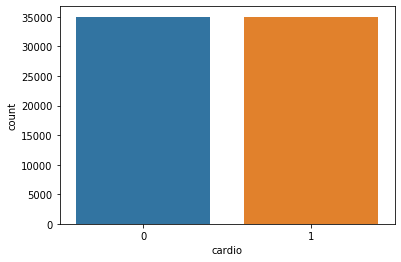

In [73]:
# Visualise 
sns.countplot(df['cardio'])

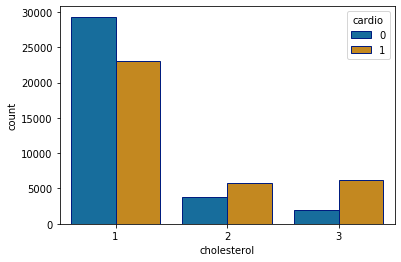

In [74]:
sns.countplot(x='cholesterol',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

In [75]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [76]:
#Compare the cardiovascular disease number 
#look years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric( df['years'], downcast= 'integer')


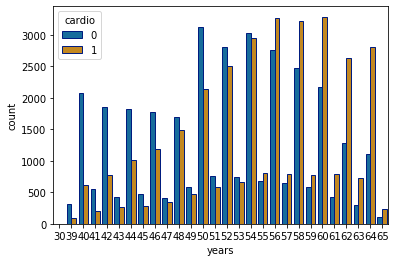

In [77]:

sns.countplot(x='years',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

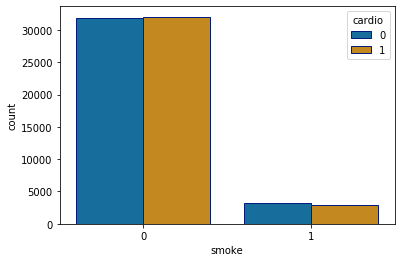

In [78]:
sns.countplot(x='smoke',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

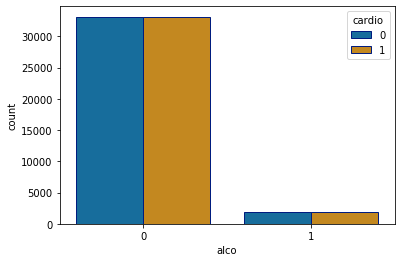

In [79]:
sns.countplot(x='alco',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

In [80]:
#df.drop(columns='age', inplace=True)

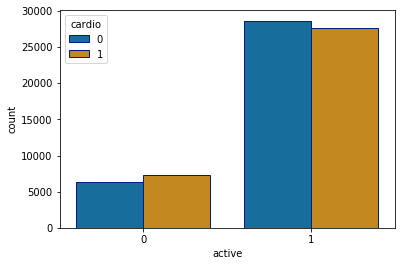

In [81]:
sns.countplot(x='active',hue='cardio',data=df,palette='colorblind',edgecolor= sns.color_palette('dark',n_colors=1))

In [82]:
#correlation of the columns 
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [83]:
#Applying one hot encoder on the categorical feature(age)

enc=OneHotEncoder(sparse=False)

df_cat = pd.get_dummies(df, columns=['gender', 'cholesterol', 'gluc'], drop_first=True)

#Joining the transform feature with the dataframe

#df=df.join(enc_df)
df_cat.head()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,years,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,18393,168,62.0,110,80,0,0,1,0,50,1,0,0,0,0
1,1,20228,156,85.0,140,90,0,0,1,1,55,0,0,1,0,0
2,2,18857,165,64.0,130,70,0,0,0,1,52,0,0,1,0,0
3,3,17623,169,82.0,150,100,0,0,1,1,48,1,0,0,0,0
4,4,17474,156,56.0,100,60,0,0,0,0,48,0,0,0,0,0


In [84]:
df = df_cat
df_cat.drop(columns=['years'], inplace=True)
df_cat.head()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,18393,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,1,20228,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,2,18857,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,3,17623,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,4,17474,156,56.0,100,60,0,0,0,0,0,0,0,0,0


# Visualise the data 

In [85]:
#drop id column 
df = df.drop('id', axis=1)

Split the Data into feature data and target data

In [86]:
y = df['cardio']
x=df.drop(columns='cardio')

# Split data in 75% training data and 25% test data

In [87]:
#Split data in 75% training data and 25% test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1)

In [88]:
#To standardize the features...


from sklearn.preprocessing import StandardScaler

std=StandardScaler()
x_train_Scaled = std.fit_transform(x_train)
x_test_Scaled = std.transform(x_test)

# KNN with K-fold cross validation

In [28]:
#Applying KNN with K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



The optimal number of neighbors is 31.


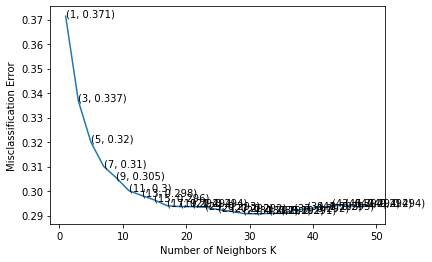

the misclassification error for each k value is :  [0.371 0.337 0.32  0.31  0.305 0.3   0.298 0.296 0.294 0.294 0.294 0.293
 0.292 0.292 0.291 0.291 0.291 0.291 0.292 0.293 0.293 0.294 0.294 0.294
 0.294]


In [29]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(x_train, y_train)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
print(r2_score(y_test,pred))
print(confusion_matrix(y_test, pred))


The accuracy of the knn classifier for k = 31 is 70.628571%
-0.1751622974907614
[[6612 1997]
 [3143 5748]]


# Using logistic regression

In [64]:

from sklearn.linear_model import LogisticRegression

logR=LogisticRegression(solver='liblinear',penalty='l1') logR.fit(x_train, y_train)

log_pred=logR.predict(x_test) acclr = accuracy_score(y_test, log_pred) * 100 print(acclr) print(r2_score(y_test,log_pred)) print(confusion_matrix(y_test, log_pred))

SyntaxError: invalid syntax (<ipython-input-64-0499e3d92513>, line 3)

# Decision Tree

In [31]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dec= DecisionTreeClassifier(criterion='gini', random_state=0)
dec.fit(x_train,y_train)
dec_pred=dec.predict(x_test)
acclr = accuracy_score(y_test, dec_pred) * 100
print(acclr)
print(r2_score(y_test,dec_pred))
print(confusion_matrix(y_test,dec_pred))

63.65142857142857
-0.4543205008441116
[[5495 3114]
 [3247 5644]]


In [36]:

dt_clf = DecisionTreeClassifier()
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [37]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [65]:

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined